<a href="https://colab.research.google.com/github/hecjhern/Procesamiento-de-Datos/blob/main/CodigoFinalReporteHectorHdzPyCdD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicialización de Datos y Validación

In [48]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving voter_panel.csv to voter_panel.csv


In [3]:
import io
PANELCompleto = pd.read_csv(io.BytesIO(uploaded['voter_panel.csv']), encoding='unicode_escape')

<ipython-input-3-0323cd28ccc2>:2: DtypeWarning: Columns (399,583,584,830,831,1019,1020,1216,1217,1431,1432,1434) have mixed types. Specify dtype option on import or set low_memory=False.
  PANELCompleto = pd.read_csv(io.BytesIO(uploaded['voter_panel.csv']), encoding='unicode_escape')


In [4]:
PANELCompleto.head()

,weight_genpop_2020Nov,weight_allpanel_2020Nov,weight_panel_2020Nov,cdid_2020Nov,inputstate_2020Nov,track_2020Nov,econtrend_2020Nov,persfinretro_2020Nov,standards_children_2020Nov,values_culture_2020Nov,...,employ_spouse_2011,employ_spouse_t_2011,phone_2011,faminc_2011,cdid_2011,incumbentpresnom_2011,incumbentpresnom_t_2011,primary12_2011,news_localevening_2011,news_localpaper_2011
0,0.617408,1.4367,1.1927,2,6.0,2.0,3.0,2.0,1.0,2.0,...,99.0,__NA__,1.0,6.0,03,1.0,,1.0,5.0,8.0
1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,__NA__,1.0,5.0,6,2.0,Hillery Clinton,1.0,7.0,7.0
2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,,1.0,10.0,21,3.0,,2.0,7.0,3.0
3,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,,3.0,4.0,12,1.0,,1.0,7.0,5.0
4,0.513165,0.3617,0.2863,1,50.0,2.0,3.0,3.0,2.0,2.0,...,99.0,__NA__,1.0,2.0,00,1.0,,1.0,4.0,2.0


In [5]:
PANELCompleto.shape

(12517, 1797)

In [6]:
PANELCompleto.columns

Index(['weight_genpop_2020Nov', 'weight_allpanel_2020Nov',
       'weight_panel_2020Nov', 'cdid_2020Nov', 'inputstate_2020Nov',
       'track_2020Nov', 'econtrend_2020Nov', 'persfinretro_2020Nov',
       'standards_children_2020Nov', 'values_culture_2020Nov',
       ...
       'employ_spouse_2011', 'employ_spouse_t_2011', 'phone_2011',
       'faminc_2011', 'cdid_2011', 'incumbentpresnom_2011',
       'incumbentpresnom_t_2011', 'primary12_2011', 'news_localevening_2011',
       'news_localpaper_2011'],
      dtype='object', length=1797)

In [7]:
PANELCompleto.isnull().sum()

weight_genpop_2020Nov       7574
weight_allpanel_2020Nov     9177
weight_panel_2020Nov       10321
cdid_2020Nov                   0
inputstate_2020Nov          7574
                           ...  
incumbentpresnom_2011       4483
incumbentpresnom_t_2011        1
primary12_2011              4483
news_localevening_2011      4483
news_localpaper_2011        4483
Length: 1797, dtype: int64

In [8]:
PANELCompleto.duplicated().sum()

0

# Selección y Limpieza de Datos

In [ ]:
#Empezamos a separar el panel en las variables que son de nuestro interés para cada año.

In [15]:
voter2016 = PANELCompleto[["cdid_2016", "votereg_2016", "turnout_2016", "presvote_2016", "obamaapp_2016", "fairsociety_2016", "beliefinmedia_2016",
                           "persfinretro_2016", "trustgovt_2016", "immi_contribution_2016",
                           "view_deathpen_2016", "envwarm_2016", "govtreg_business_2016", "sexism_equality_2016", "gunowner_2016",
                           "educ_2016", "marstat_2016", "employment_2016", "newsint_2016", "religion_2016"]]

In [16]:
voter2016.shape

(12517, 20)

In [17]:
voter2016.isnull().sum()

cdid_2016                 4037
votereg_2016              4483
turnout_2016              4483
presvote_2016             4483
obamaapp_2016             4483
fairsociety_2016          4483
beliefinmedia_2016        4483
persfinretro_2016         4483
trustgovt_2016            4483
immi_contribution_2016    4483
view_deathpen_2016        4483
envwarm_2016              4483
govtreg_business_2016     4483
sexism_equality_2016      4483
gunowner_2016             4483
educ_2016                 4483
marstat_2016              4483
employment_2016           4483
newsint_2016              4483
religion_2016             4483
dtype: int64

In [18]:
 voteclean = voter2016[voter2016["votereg_2016"].isin([1,2])]

In [20]:
 voteclean = voteclean[voteclean["turnout_2016"].isin([1,2])]

In [21]:
 voteclean = voteclean[voteclean["presvote_2016"].isin([1,2])]

In [23]:
 voteclean = voteclean[voteclean["obamaapp_2016"].isin([1,2,3,4])]

In [24]:
 voteclean = voteclean[voteclean["fairsociety_2016"].isin([1,2,3,4])]

In [25]:
 voteclean = voteclean[voteclean["beliefinmedia_2016"].isin([1,2,3,4])]

In [26]:
 voteclean = voteclean[voteclean["persfinretro_2016"].isin([1,2,3])]

In [27]:
 voteclean = voteclean[voteclean["trustgovt_2016"].isin([1,2,3])]

In [28]:
 voteclean = voteclean[voteclean["immi_contribution_2016"].isin([1,2,3])]

In [29]:
voteclean = voteclean[voteclean["view_deathpen_2016"].isin([1,2])]

In [30]:
voteclean = voteclean[voteclean["envwarm_2016"].isin([1,2,3,4])]

In [31]:
voteclean = voteclean[voteclean["govtreg_business_2016"].isin([1,2,3])]

In [32]:
voteclean = voteclean[voteclean["sexism_equality_2016"].isin([1,2,3,4])]

In [33]:
voteclean = voteclean[voteclean["gunowner_2016"].isin([1,2,3])]

In [34]:
voteclean = voteclean[voteclean["marstat_2016"].isin([1,2,3,4,5,6])]

In [36]:
voteclean = voteclean[voteclean["employment_2016"].isin([1,2,3,4,5,6])]

In [37]:
voteclean = voteclean[voteclean["newsint_2016"].isin([1,2,3,4])]

In [38]:
voteclean = voteclean[voteclean["religion_2016"].isin([1,2,3,4,5,6,7,8,9,10,11,12])]

In [39]:
voteclean.head()

,cdid_2016,votereg_2016,turnout_2016,presvote_2016,obamaapp_2016,fairsociety_2016,beliefinmedia_2016,persfinretro_2016,trustgovt_2016,immi_contribution_2016,view_deathpen_2016,envwarm_2016,govtreg_business_2016,sexism_equality_2016,gunowner_2016,educ_2016,marstat_2016,employment_2016,newsint_2016,religion_2016
0,602.0,1.0,1.0,1.0,1.0,4.0,4.0,2.0,3.0,1.0,2.0,1.0,3.0,4.0,3.0,5.0,4.0,5.0,1.0,2.0
1,5506.0,1.0,1.0,1.0,1.0,4.0,4.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,2.0,5.0,5.0,1.0,2.0
2,4828.0,1.0,1.0,2.0,4.0,1.0,1.0,2.0,3.0,3.0,1.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,1.0,3.0
4,5001.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,3.0,4.0,3.0,3.0,3.0,5.0,1.0,9.0
5,1206.0,1.0,1.0,1.0,2.0,2.0,4.0,2.0,3.0,1.0,2.0,1.0,3.0,4.0,2.0,6.0,1.0,5.0,1.0,2.0


In [ ]:
#Después de esto se quitan las variables cdid, votereg y turnout, que solo eran variables que nos ayudaban
# a validar que las personas si hayan votado, estuvieran registradas y fueran a la elección.

In [40]:
voteclean = voteclean.drop("cdid_2016", axis=1)

In [41]:
voteclean = voteclean.drop("votereg_2016", axis=1)

In [42]:
voteclean = voteclean.drop("turnout_2016", axis=1)

In [72]:
voteclean['presvote_2016'] = voteclean['presvote_2016'].replace([1,2],[0,1])

In [105]:
voteclean.shape

(4326, 17)

# **Estadística Descriptiva**

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

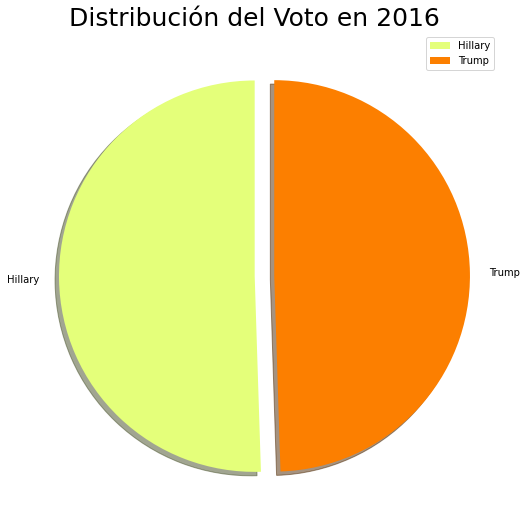

In [74]:
labels = ['Hillary', 'Trump']
size = voteclean['presvote_2016'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribución del Voto en 2016', fontsize = 25)
plt.legend()
plt.show()

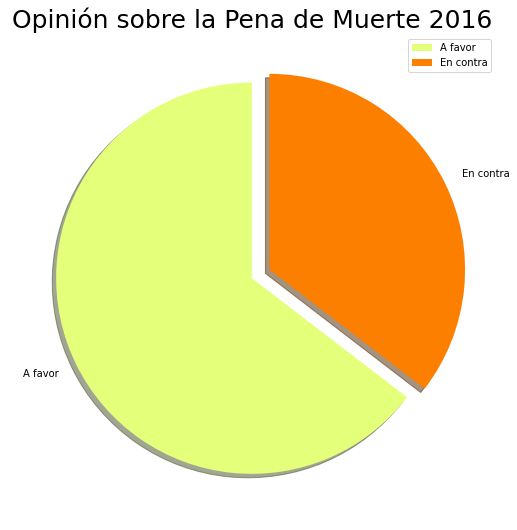

In [75]:
labels = ['A favor', 'En contra']
size = voteclean['view_deathpen_2016'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Opinión sobre la Pena de Muerte 2016', fontsize = 25)
plt.legend()
plt.show()

In [76]:
print(voteclean["obamaapp_2016"].value_counts())

4.0    1860
1.0    1386
2.0     743
3.0     337
Name: obamaapp_2016, dtype: int64


In [77]:
print(voteclean["fairsociety_2016"].value_counts())

2.0    1638
3.0    1306
1.0     814
4.0     568
Name: fairsociety_2016, dtype: int64


In [78]:
print(voteclean["beliefinmedia_2016"].value_counts())

1.0    1791
2.0    1134
3.0    1043
4.0     358
Name: beliefinmedia_2016, dtype: int64


In [79]:
print(voteclean["view_deathpen_2016"].value_counts())

1.0    2794
2.0    1532
Name: view_deathpen_2016, dtype: int64


# Metodología y Resultados

In [80]:
X=voteclean.drop("presvote_2016", axis=1)
Y=voteclean["presvote_2016"]

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=16)

In [82]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

modelo1 = logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

In [83]:
print(modelo1.coef_, modelo1.intercept_)

[[ 1.77998059 -0.79223766 -0.63789003  0.43629723 -0.0039685   0.77694323
  -0.17784854  0.70978399 -0.67951885 -0.33715949 -0.262153    0.00495878
  -0.0279759  -0.09631143  0.04215578 -0.00504236]] [-2.16356927]


In [84]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.108672
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          presvote_2016   No. Observations:                 4326
Model:                          Logit   Df Residuals:                     4310
Method:                           MLE   Df Model:                           15
Date:                Mon, 20 Mar 2023   Pseudo R-squ.:                  0.8432
Time:                        16:31:16   Log-Likelihood:                -470.11
converged:                       True   LL-Null:                       -2998.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
obamaapp_2016              1.8421      0.095     19.378      0.000       1.656      

In [ ]:
#Se observa que la variable de las noticias no es significativa, por lo que se considera dejarla.

In [85]:
X = X.drop("newsint_2016", axis=1)

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=16)

In [88]:
logreg = LogisticRegression(random_state=16)

modelo2 = logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

In [89]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.108676
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          presvote_2016   No. Observations:                 4326
Model:                          Logit   Df Residuals:                     4311
Method:                           MLE   Df Model:                           14
Date:                Mon, 20 Mar 2023   Pseudo R-squ.:                  0.8432
Time:                        16:34:09   Log-Likelihood:                -470.13
converged:                       True   LL-Null:                       -2998.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
obamaapp_2016              1.8421      0.095     19.376      0.000       1.656      

In [ ]:
#La siguiente variable en no ser significativa es la de educación, por lo que también se quita.

In [90]:
X = X.drop("educ_2016", axis=1)

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=16)
logreg = LogisticRegression(random_state=16)

modelo2 = logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

In [92]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.108685
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          presvote_2016   No. Observations:                 4326
Model:                          Logit   Df Residuals:                     4312
Method:                           MLE   Df Model:                           13
Date:                Mon, 20 Mar 2023   Pseudo R-squ.:                  0.8432
Time:                        16:35:24   Log-Likelihood:                -470.17
converged:                       True   LL-Null:                       -2998.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
obamaapp_2016              1.8407      0.095     19.388      0.000       1.655      

In [ ]:
#Por último se observa que la variable religión marca no significativa, por lo que también se quita.

In [93]:
X = X.drop("religion_2016", axis=1)

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=16)
logreg = LogisticRegression(random_state=16)

modelo2 = logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

In [95]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.108750
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          presvote_2016   No. Observations:                 4326
Model:                          Logit   Df Residuals:                     4313
Method:                           MLE   Df Model:                           12
Date:                Mon, 20 Mar 2023   Pseudo R-squ.:                  0.8431
Time:                        16:36:55   Log-Likelihood:                -470.45
converged:                       True   LL-Null:                       -2998.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
obamaapp_2016              1.8444      0.095     19.429      0.000       1.658      

In [ ]:
#Finalmente, la variable de estatus marital no da significativa, por lo que se procede a quitar.

In [96]:
X = X.drop("marstat_2016", axis=1)

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=16)
logreg = LogisticRegression(random_state=16)

modelo2 = logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

In [98]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.108879
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          presvote_2016   No. Observations:                 4326
Model:                          Logit   Df Residuals:                     4314
Method:                           MLE   Df Model:                           11
Date:                Mon, 20 Mar 2023   Pseudo R-squ.:                  0.8429
Time:                        16:38:37   Log-Likelihood:                -471.01
converged:                       True   LL-Null:                       -2998.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
obamaapp_2016              1.8440      0.095     19.435      0.000       1.658      

In [ ]:
#Decidimos quedarnos con este resultado ya que todas las variables son significativas y se tiene una R cuadrada de nivel más que aceptable.

In [100]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[538,  23],
       [ 28, 493]])

Text(0.5, 15.0, 'Predicted label')

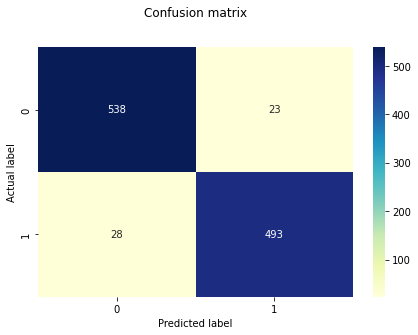

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6,4))
class_names=[0,1] # name  of classes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [106]:
from sklearn.metrics import classification_report
target_names = ['Votos a favor de Trump', 'Votos en Contra de Trump']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                          precision    recall  f1-score   support

  Votos a favor de Trump       0.95      0.96      0.95       561
Votos en Contra de Trump       0.96      0.95      0.95       521

                accuracy                           0.95      1082
               macro avg       0.95      0.95      0.95      1082
            weighted avg       0.95      0.95      0.95      1082



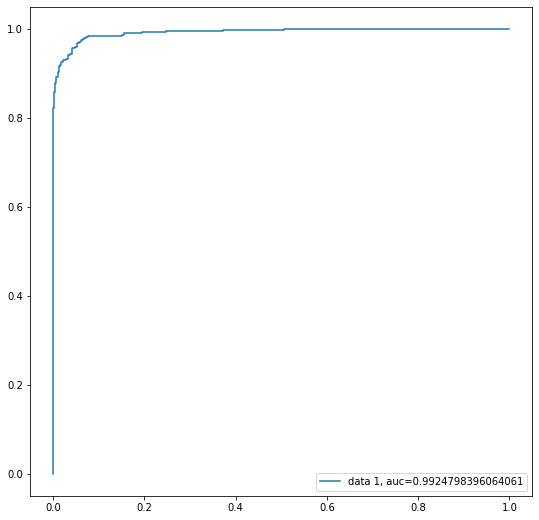

In [103]:
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()